In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
print(dataset)
X = dataset.iloc[0:, 1:2].values
Y = dataset.iloc[0:, 2:3].values
print("X: ", X, "\nY: ", Y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
X:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 
Y:  [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

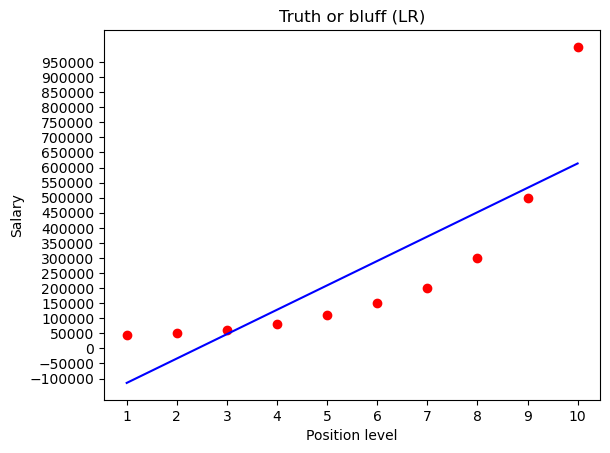

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
linearYPrediction = lin_reg.predict(X)

def viz_linear():
    plt.scatter(X, Y, color="red")
    plt.plot(X, linearYPrediction, color="blue")
    plt.title("Truth or bluff (LR)")
    plt.xlabel("Position level")
    plt.ylabel("Salary")
    plt.xticks(X, size=10)
    plt.yticks([i for i in range(-100000, 1000000, 50000)], size=10)
    plt.show()
    return
viz_linear()

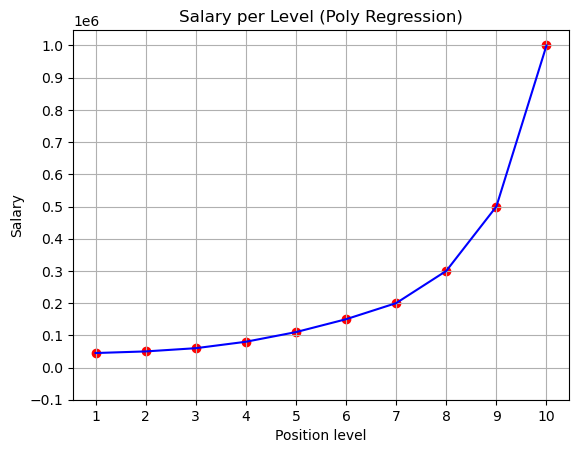

In [47]:
poly_reg = PolynomialFeatures(degree=10)
X_poly_reg = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly_reg, Y)
polyYPrediction = pol_reg.predict(X_poly_reg)

def viz_polymonial():
    plt.scatter(X, Y, color='red')
    plt.plot(X, polyYPrediction, color='blue')
    plt.title('Salary per Level (Poly Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.xticks([i for i in np.arange(1, 11, 1)], size=10)
    plt.yticks([i for i in range(-100000, 1100000, 100000)], size=10)
    plt.grid()
    plt.show()
    return
viz_polymonial()

In [50]:
print(lin_reg.predict([[5.5]])) #predict the salary at position level 5.5 with linear regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]]))) #predcit the salary at position level 5.5 with polynominal regression

[[249500.]]
[[129243.47645342]]


In [53]:
print(lin_reg.predict([[0.5]]))
print(pol_reg.predict(poly_reg.fit_transform([[0.5]])))

[[-154893.93939394]]
[[17480.84370934]]
